In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Reshm\Downloads\all_season_details.csv", low_memory = False)

In [3]:
df.head(2)

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,110,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"nice and full, angling and perhaps swinging in...",<p><strong>7.30pm</strong> Gaikwad and Conway ...,NaN
1,120,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Conway shuffles across off, and shimmies out a...",NaN,NaN


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242550 entries, 0 to 242549
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   comment_id         242550 non-null  int64  
 1   season             242067 non-null  float64
 2   match_id           242550 non-null  int64  
 3   match_name         242550 non-null  object 
 4   home_team          242550 non-null  object 
 5   away_team          242550 non-null  object 
 6   current_innings    242550 non-null  object 
 7   innings_id         242550 non-null  int64  
 8   over               242550 non-null  int64  
 9   ball               242550 non-null  int64  
 10  runs               242550 non-null  int64  
 11  shortText          242550 non-null  object 
 12  isBoundary         242550 non-null  bool   
 13  isWide             242550 non-null  bool   
 14  isNoball           242550 non-null  bool   
 15  batsman1_id        242550 non-null  int64  
 16  ba

In [7]:
print(df.describe())

          comment_id         season      match_id     innings_id  \
count  242550.000000  242067.000000  2.425500e+05  242550.000000   
mean    86415.531767    2015.588048  8.701769e+05       1.483245   
std     79516.360959       4.639506  3.530671e+05       0.499720   
min       110.000000    2008.000000  3.359820e+05       1.000000   
25%     18040.000000    2012.000000  5.483150e+05       1.000000   
50%     29010.000000    2015.000000  8.298190e+05       1.000000   
75%    118060.000000    2020.000000  1.216506e+06       2.000000   
max    219080.000000    2023.000000  1.370353e+06       2.000000   

                over           ball           runs   batsman1_id  \
count  242550.000000  242550.000000  242550.000000  2.425500e+05   
mean       10.161678       3.483875       1.317901  2.503057e+05   
std         5.658053       1.707451       1.612821  2.968806e+05   
min         1.000000       1.000000       0.000000  4.292000e+03   
25%         5.000000       2.000000       0.000

In [12]:
print(df.columns)

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText'],
      dtype='object')


In [8]:
print(df.isnull().sum())

comment_id                0
season                  483
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
shortText                 0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler2_wkts          12841
wicket_id           

In [9]:
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0])

season                0.199134
batsman2_name         0.000825
bowler2_id            5.294166
bowler2_name          5.294166
bowler2_overs         5.294166
bowler2_maidens       5.294166
bowler2_runs          5.294166
bowler2_wkts          5.294166
wicket_id            95.102041
wkt_batsman_name     95.102041
wkt_bowler_name      95.102041
wkt_batsman_runs     95.102041
wkt_batsman_balls    95.102041
wkt_text             95.102041
text                  0.565657
preText              80.921459
postText             91.880437
dtype: float64


In [10]:
# Check unique values in important columns
print(df['season'].nunique(), "unique seasons:", df['season'].unique())
print(df['match_id'].nunique(), "unique matches")
print(df['home_team'].nunique(), "unique home teams:", df['home_team'].unique())

16 unique seasons: [2023.   nan 2022. 2021. 2020. 2019. 2018. 2017. 2016. 2015. 2014. 2013.
 2012. 2011. 2010. 2009. 2008.]
1023 unique matches
15 unique home teams: ['GT' 'PBKS' 'LSG' 'SRH' 'RCB' 'CSK' 'DC' 'RR' 'KKR' 'MI' 'KXIP' 'RPS'
 'GL' 'PWI' 'Kochi']


In [16]:
# Top home teams
print(df['home_team'].value_counts().head())

# Top away teams
print(df['away_team'].value_counts().head())


home_team
CSK    29624
SRH    29061
DC     28900
RCB    28478
MI     28333
Name: count, dtype: int64
away_team
MI     30851
KKR    28963
SRH    28553
RCB    27839
DC     27174
Name: count, dtype: int64


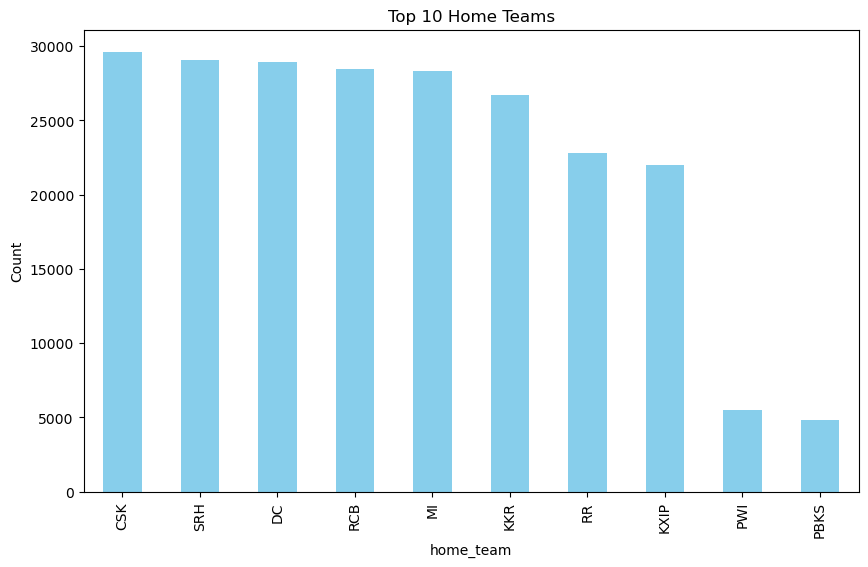

In [17]:
# Bar plot for top home teams
plt.figure(figsize=(10, 6))
df['home_team'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Home Teams')
plt.ylabel('Count')
plt.show()


In [18]:
# Total boundaries
total_boundaries = df['isBoundary'].sum()
print(f"Total Boundaries Hit: {total_boundaries}")

# Average boundaries per match
boundaries_per_match = df.groupby('match_id')['isBoundary'].sum().mean()
print(f"Average Boundaries per Match: {boundaries_per_match:.2f}")


Total Boundaries Hit: 39186
Average Boundaries per Match: 38.30


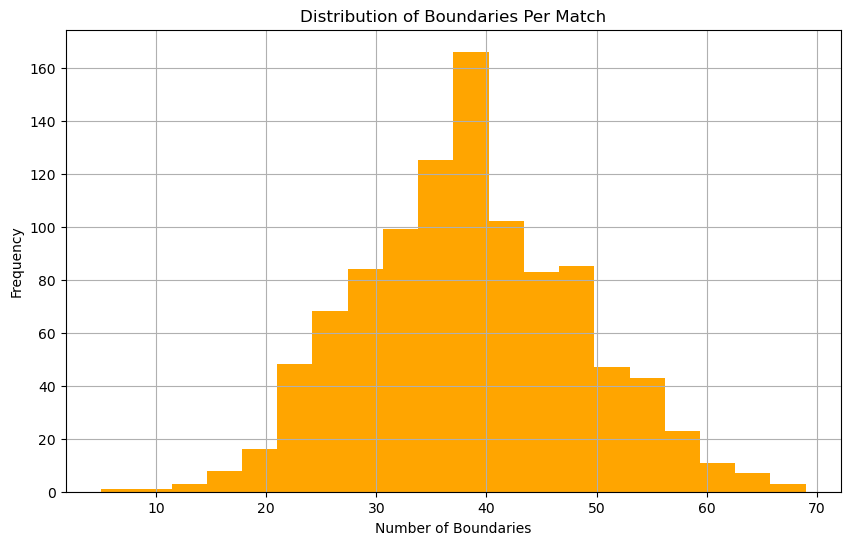

In [19]:
# Distribution of boundaries across matches
plt.figure(figsize=(10, 6))
df.groupby('match_id')['isBoundary'].sum().hist(bins=20, color='orange')
plt.title('Distribution of Boundaries Per Match')
plt.xlabel('Number of Boundaries')
plt.ylabel('Frequency')
plt.show()


bowler1_name
Yuzvendra Chahal       1966
Piyush Chawla          1960
Ravichandran Ashwin    1918
Amit Mishra            1875
Bhuvneshwar Kumar      1721
Sunil Narine           1693
Harbhajan Singh        1677
Dwayne Bravo           1668
Lasith Malinga         1614
Ravindra Jadeja        1554
Name: bowler1_wkts, dtype: int64


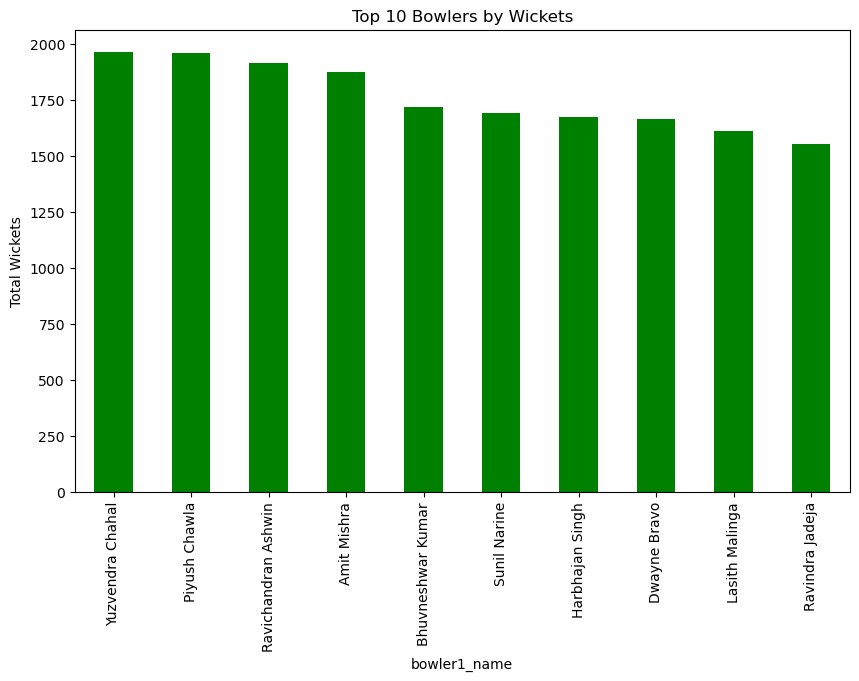

In [20]:
# Top bowlers by wickets
top_bowlers = df.groupby('bowler1_name')['bowler1_wkts'].sum().sort_values(ascending=False).head(10)
print(top_bowlers)

# Bar plot for top bowlers
top_bowlers.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Top 10 Bowlers by Wickets')
plt.ylabel('Total Wickets')
plt.show()


batsman1_name
Virat Kohli       133423
David Warner      126924
Shikhar Dhawan    126135
Rohit Sharma       97967
Chris Gayle        94477
Suresh Raina       86088
KL Rahul           85826
Ajinkya Rahane     80968
Gautam Gambhir     79674
AB de Villiers     76932
Name: batsman1_runs, dtype: int64


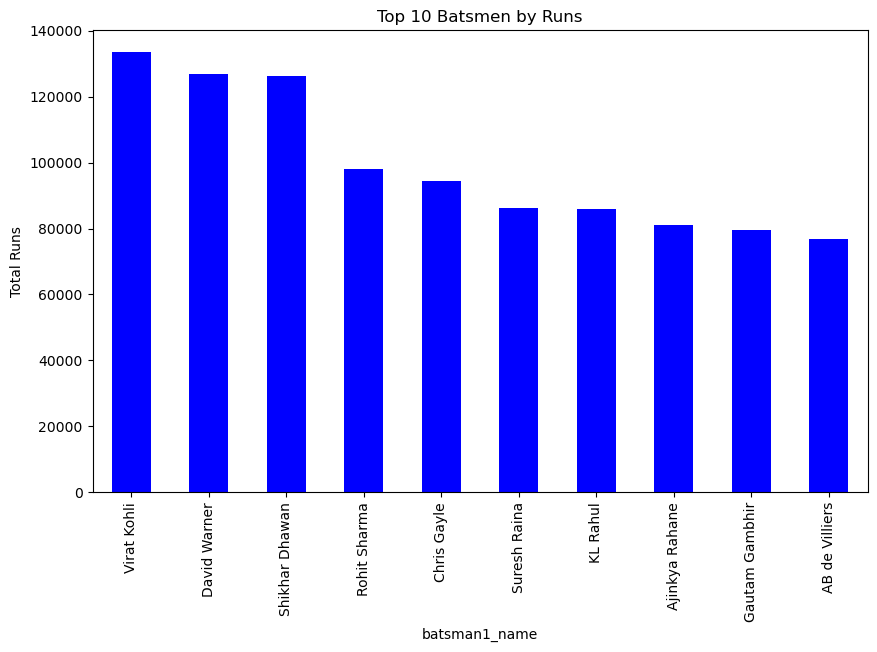

In [21]:
# Top batsmen by runs
top_batsmen = df.groupby('batsman1_name')['batsman1_runs'].sum().sort_values(ascending=False).head(10)
print(top_batsmen)

# Bar plot for top batsmen
top_batsmen.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Top 10 Batsmen by Runs')
plt.ylabel('Total Runs')
plt.show()


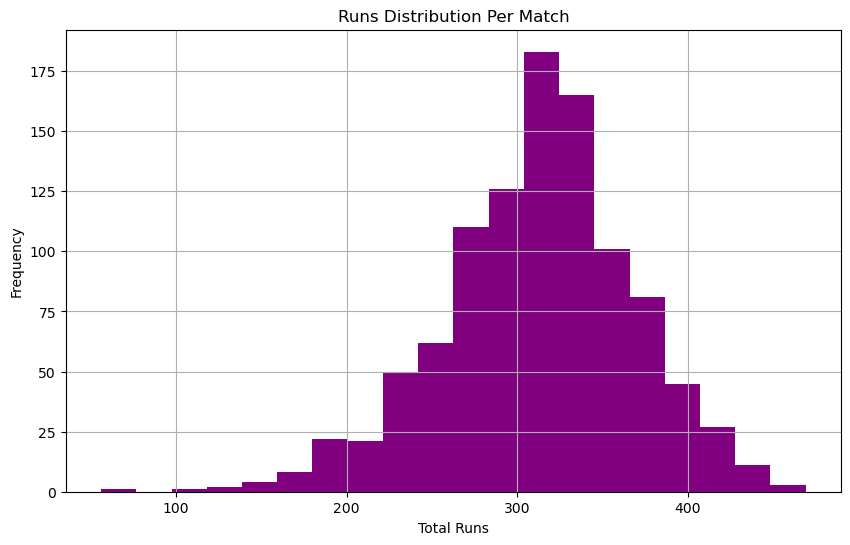

In [22]:
# Total runs per match
runs_per_match = df.groupby('match_id')['runs'].sum()

# Histogram of runs per match
plt.figure(figsize=(10, 6))
runs_per_match.hist(bins=20, color='purple')
plt.title('Runs Distribution Per Match')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()


In [23]:
# Total wides and no-balls
total_wides = df['isWide'].sum()
total_noballs = df['isNoball'].sum()
print(f"Total Wides: {total_wides}")
print(f"Total No-balls: {total_noballs}")


Total Wides: 7601
Total No-balls: 1001


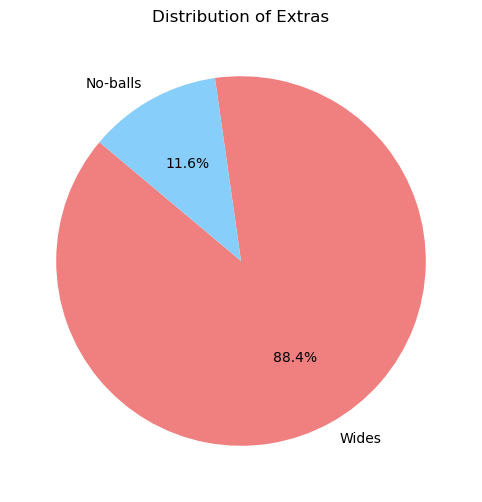

In [24]:
# Pie chart for extras
labels = ['Wides', 'No-balls']
sizes = [total_wides, total_noballs]
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Extras')
plt.show()


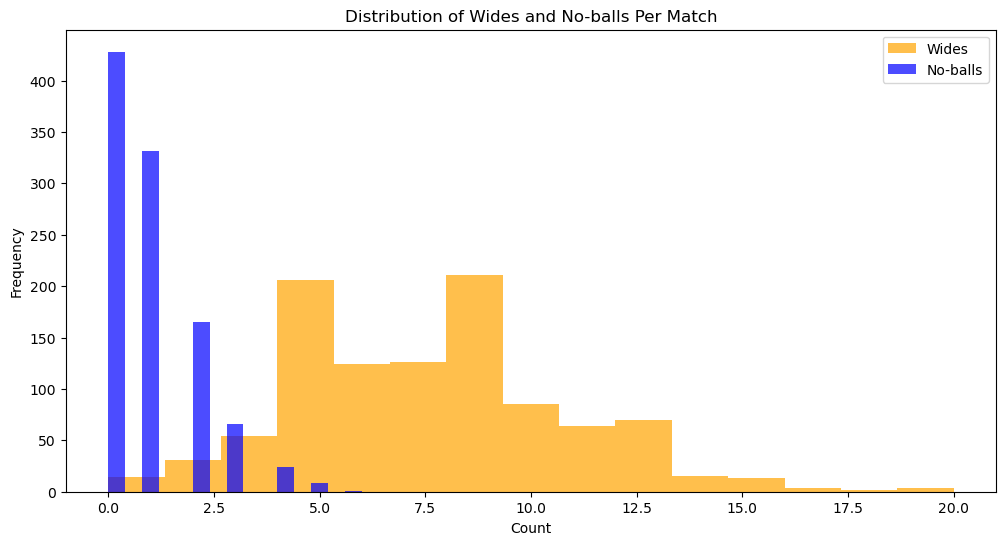

In [26]:
# Distribution of wides per match
wides_per_match = df.groupby('match_id')['isWide'].sum()

# Distribution of no-balls per match
noballs_per_match = df.groupby('match_id')['isNoball'].sum()

# Plot wides and no-balls per match
plt.figure(figsize=(12, 6))
plt.hist(wides_per_match, bins=15, alpha=0.7, label='Wides', color='orange')
plt.hist(noballs_per_match, bins=15, alpha=0.7, label='No-balls', color='blue')
plt.title('Distribution of Wides and No-balls Per Match')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


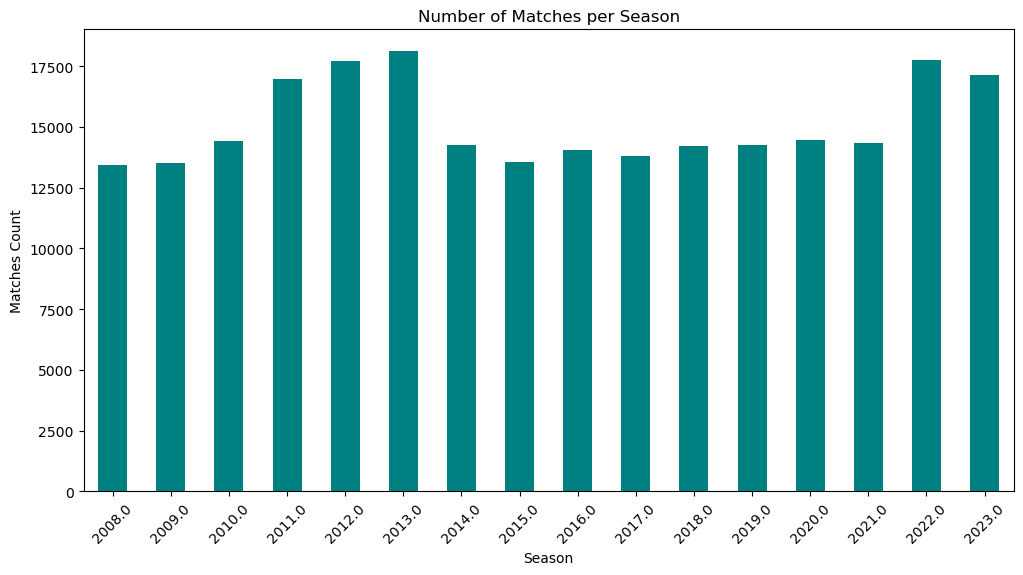

In [27]:
# Matches per season
matches_per_season = df['season'].value_counts().sort_index()

# Plotting the distribution of matches per season
plt.figure(figsize=(12, 6))
matches_per_season.plot(kind='bar', color='teal')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Matches Count')
plt.xticks(rotation=45)
plt.show()


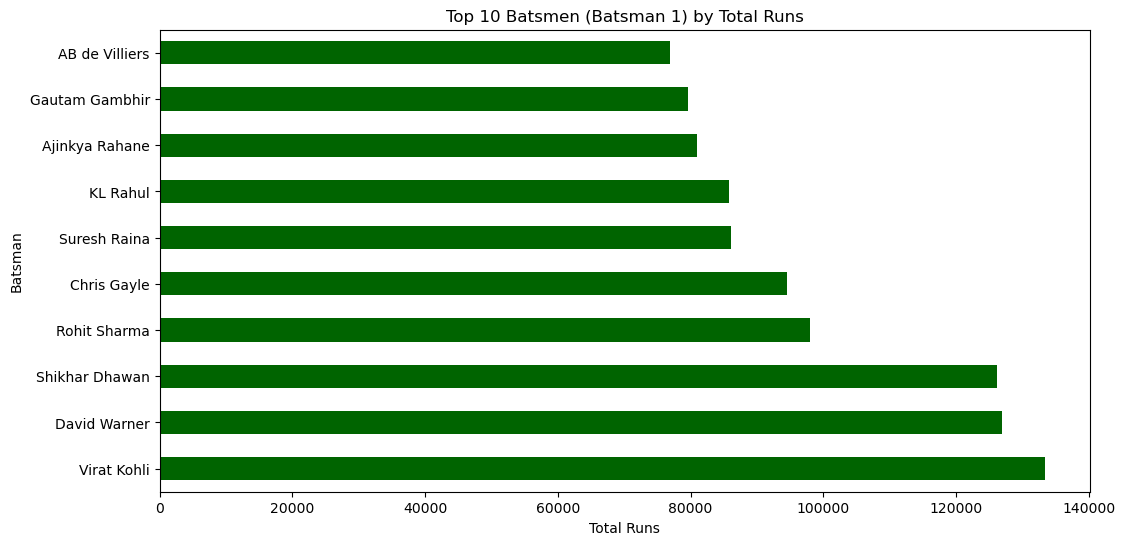

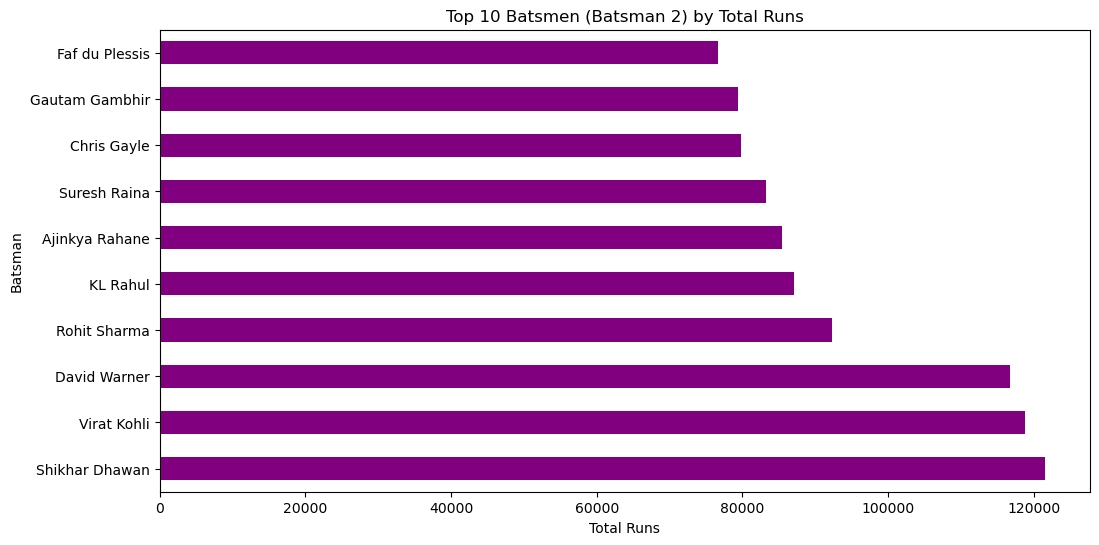

In [28]:
# Top 10 batsman1 performances based on runs scored
top_batsmen1 = df.groupby('batsman1_name')['batsman1_runs'].sum().sort_values(ascending=False).head(10)

# Plotting top batsmen based on runs scored
plt.figure(figsize=(12, 6))
top_batsmen1.plot(kind='barh', color='darkgreen')
plt.title('Top 10 Batsmen (Batsman 1) by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

# Top 10 batsman2 performances based on runs scored
top_batsmen2 = df.groupby('batsman2_name')['batsman2_runs'].sum().sort_values(ascending=False).head(10)

# Plotting top batsmen based on runs scored
plt.figure(figsize=(12, 6))
top_batsmen2.plot(kind='barh', color='purple')
plt.title('Top 10 Batsmen (Batsman 2) by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()


In [33]:
df.to_csv('all_season_details_data_after_eda.csv', index=False)